# Author: K Krishna Swaroop (181CO125)
# Section - 1 : Midsem

# Dataset


This [Heart Disease UCI ](https://archive.ics.uci.edu/ml/datasets/heart+disease)dataset contains 14 attributes, (13 features and 1 target attribute) they are
- age 
- sex 
- chest pain type (4 values) 
- resting blood pressure 
- serum cholestoral in mg/dl 
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved 
- exercise induced angina 
- oldpeak = ST depression induced by exercise relative to   rest 
- the slope of the peak exercise ST segment 
- number of major vessels (0-3) colored by flourosopy 
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The goal is to predict whether or not the patient has heart disease (0- no heart disease, 1- possibility of heart disease)

This notebook has been divided into 4 main sections. They are

**1) Dataset Exploration and Visualisation**

**2) Feature Engineering and Data split**

**3) Model Training**

**4) Analysis and Performance Measures**

I've also added a conclusion section which presents the best performance measure of the bayesian network

# Part 1 - Dataset Exploration and Visualisation

## 1) Import Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## 2) Import Data

In [2]:
df_path = "/content/drive/MyDrive/Colab Notebooks/ML-Lab/Midsem/cleveland.csv"
df = pd.read_csv(df_path)

## 3) Data Information

In [3]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


## 4) Data Visualisation - Pairplot

Below we plot the correlation between each pair of 14 features to understand feature importance

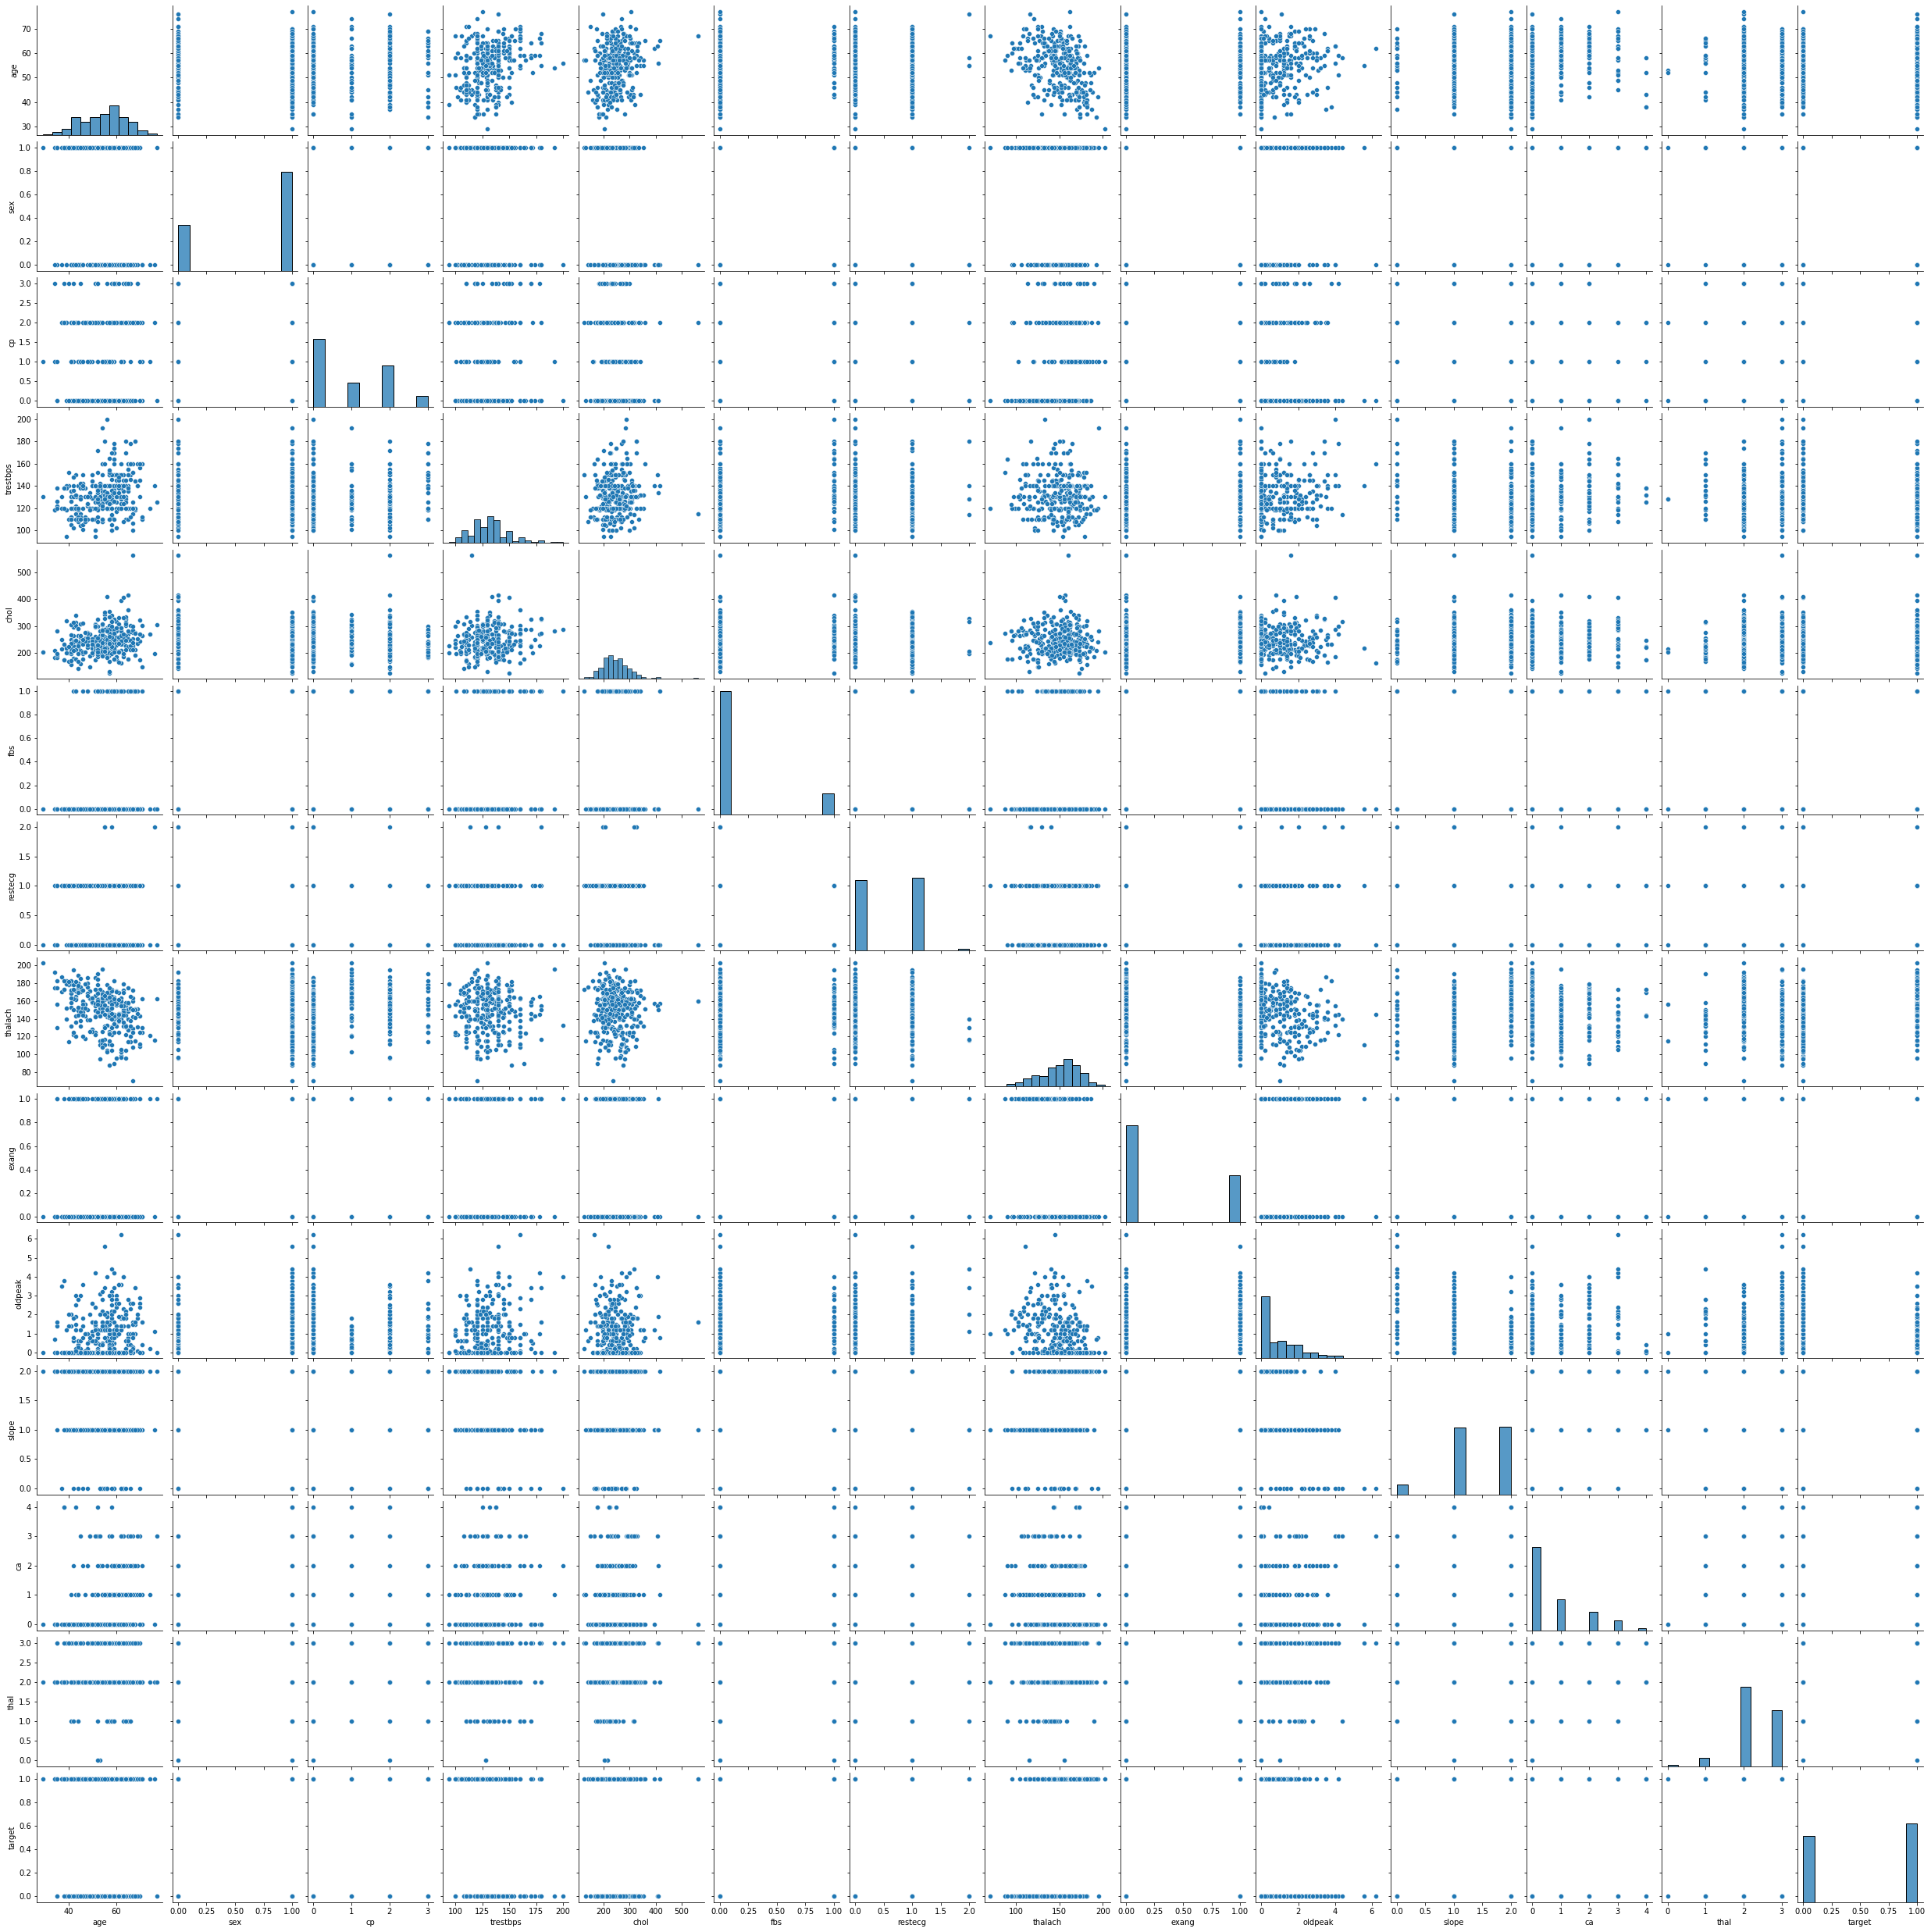

In [5]:
sns.pairplot(df)

## 5) Data Visualisation - Heat Map

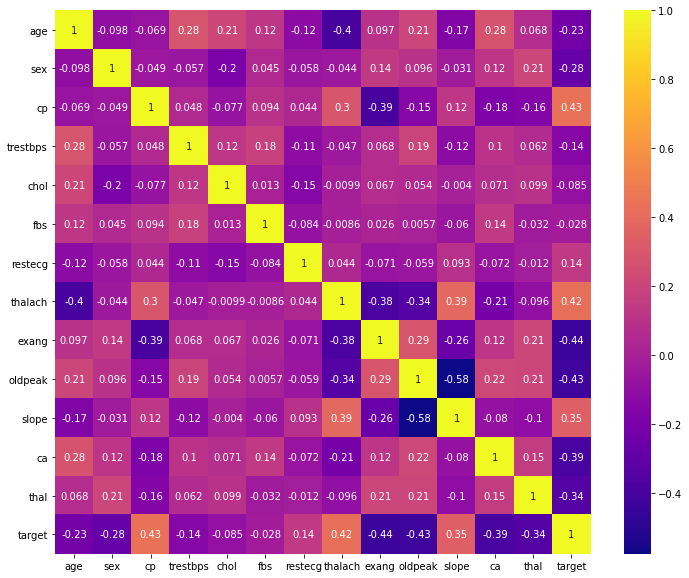

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.plasma)

## 6) Data Visualisation - Scatter Plot 

Below, we print the scatter plot to understand how individual features are distributed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

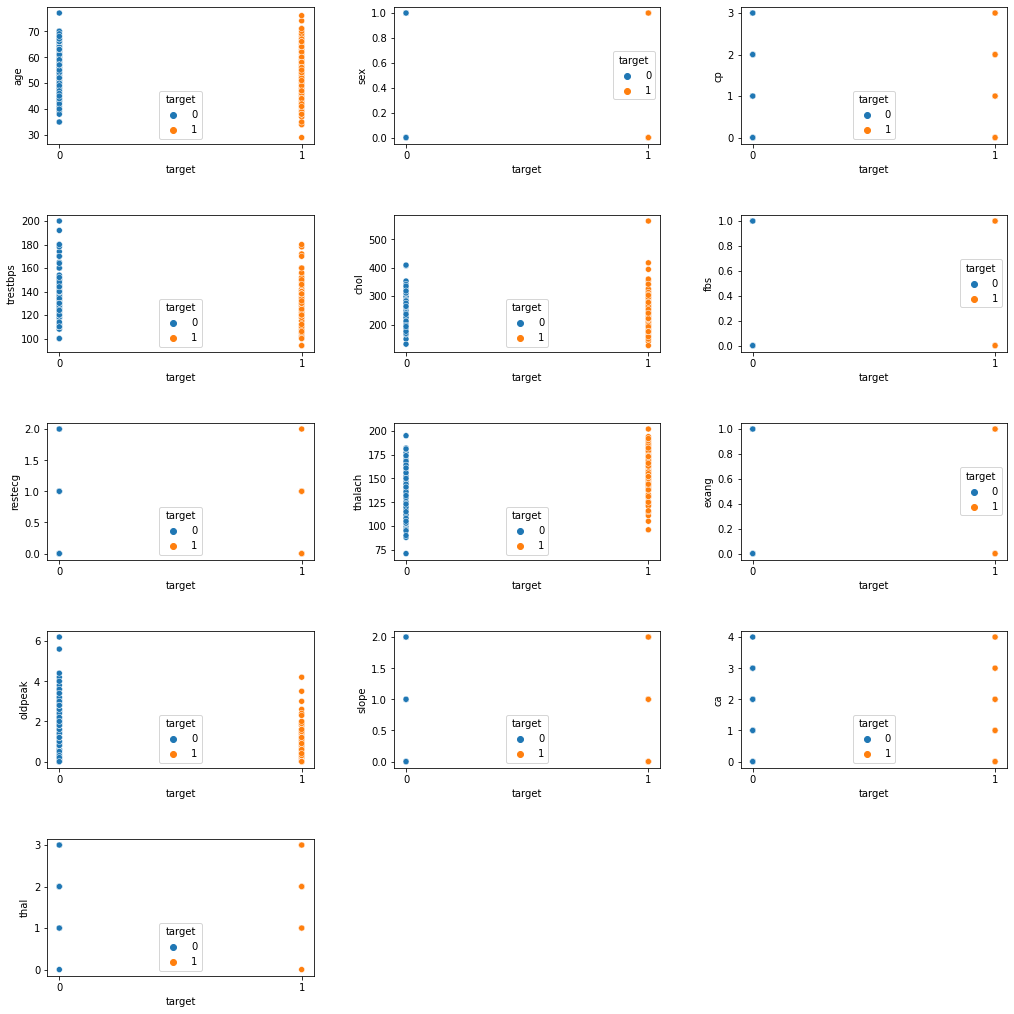

In [7]:
plt.figure(figsize=(15,15))
for i in range(len(df.columns)-1):
    plt.subplot(5,3,i+1)
    sns.scatterplot(df['target'],df[df.columns[i]],hue=df['target'])
    plt.xticks([0,1])
plt.tight_layout(pad=4.0)

# Part 2 - Feature Engineering and Data Split

From the above data exploration, it is clear that not all features are on the same scale, so scaling is important for the bayesian model to learn

We are using the Standard Scaler library to scale the data

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=df.drop('target',axis=1)
Y=df['target']
df=sc.fit(X).transform(X)

Here, we split the data using `train_test_split()` with 25% in the testing set

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=3)

# Part 3 - Model Training

We will use three bayesian variants namely Gaussian NB, Bernoulli NB and Multinomial NB

In [10]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [11]:
def model(X_train,y_train):
  """
  Helper function which trains three different bayesian networks and returns them as a list
  """
  models=[]
  
  bnb = BernoulliNB()
  bnb.fit(X_train, y_train)
  models.append(bnb)
  
  nb=GaussianNB()
  nb.fit(X_train,y_train)
  models.append(nb)

  mnb = MultinomialNB()
  mnb.fit(X_train, y_train)
  models.append(mnb)
  
  return models

## 1) Model training

In [12]:
models = model(X_train, y_train)

## 2) Model prediction

In [13]:
from sklearn.metrics import accuracy_score
train_accuracy=[]
test_accuracy=[]

for i in range(3):
    yhat=models[i].predict(X_test)
    yhat_t=models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t,y_train))
    test_accuracy.append(accuracy_score(yhat,y_test))

## 3) Accuracy Scores

In [14]:
Accuracy_score=pd.DataFrame({ 
    'Model':['BernoulliNB', 'GaussianNB', 'MultinomialNB'],
    'Train_Accuracy':train_accuracy,
    'Test_Accuracy':test_accuracy
})

In [15]:
print(Accuracy_score)

           Model  Train_Accuracy  Test_Accuracy
0    BernoulliNB        0.797357       0.855263
1     GaussianNB        0.828194       0.881579
2  MultinomialNB        0.735683       0.815789


# Part 4 - Analysis and Performance Measures

In [16]:
Model = ['BernoulliNB', 'GaussianNB', 'MultinomialNB']

In [17]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) 
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])}

## 1) Model vs Accuracy

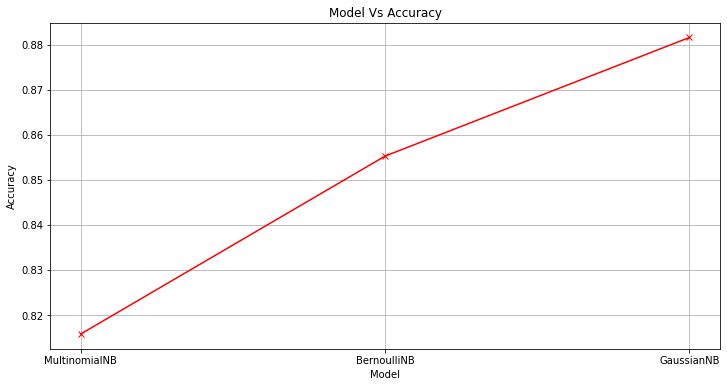

In [18]:
plt.figure(figsize=(12,6))
plt.plot(list(score.keys()),list(score.values()),marker='x',color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')
plt.grid()


We can see that **GaussianNB** gives us the highest test accuracy of 88.15%

## 2) Confusion Matrix

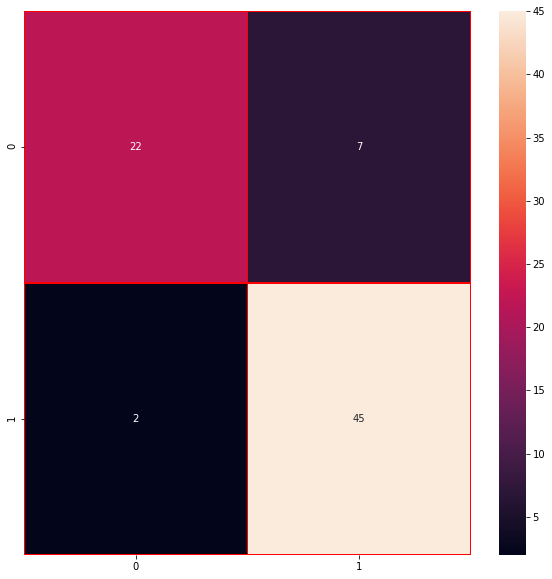

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = models[1].predict(X_test)
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

## 3) F1-Score

In [20]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.9090909090909091


## 4) Accuracy Score

In [21]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.881578947368421


## 5) Precision

In [22]:
print("Precision:",precision_score(y_test, y_pred))


Precision: 0.8653846153846154


## 6) Recall 

In [23]:
print("Recall:",recall_score(y_test, y_pred))


Recall: 0.9574468085106383


## Conclusion

We have used the Cleveland dataset for our heart prediction problem here. Out of the three bayesian models we used, **GaussianNB** gave us the highest test accuracy of **88.15%**


Other performance metrics are below:

>**F1 Score**:  0.909


>**Precision**: 0.865


>**Recall**: 0.957